# Nama : Aido Luthfi Al Hakim
# Kelas : TI - 3A
# Absen : 06
# NIM : 2141720136

## Kelompok:
#### - Aido Lutfhi AL Hakim | 2141720136
#### - Jauhar Maulana A'la | 2141720186
#### - Naufal Falah Wafiuddin | 2141720129
Link GitHub : [github](https://github.com/luthf-ai/seni_komputer)

1. Import folder yang ada di Drive anda dengan cara berikut

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

3.  Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


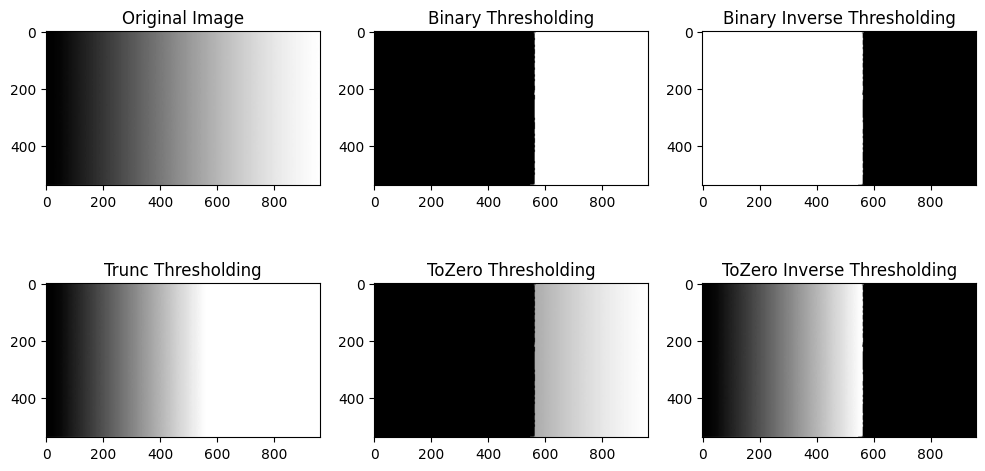

In [3]:
original_image = cv2.imread('image_thres/gradient.jpg', 0) 

ret, binary_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_BINARY)

ret, binary_inv_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_BINARY_INV)

ret, trunc_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_TRUNC)

ret, tozero_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_TOZERO)

ret, tozero_inv_threshold = cv2.threshold(original_image, 170, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Binary Thresholding')
plt.imshow(binary_threshold, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Binary Inverse Thresholding')
plt.imshow(binary_inv_threshold, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Trunc Thresholding')
plt.imshow(trunc_threshold, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('ToZero Thresholding')
plt.imshow(tozero_threshold, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('ToZero Inverse Thresholding')
plt.imshow(tozero_inv_threshold, cmap='gray')

plt.show()


4.  Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

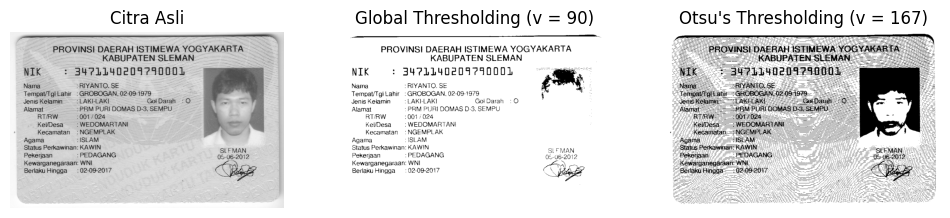

In [26]:
original_image = cv2.imread('image_thres/ktp.jpeg', 0)

if original_image is None:
    print("Image not found or could not be loaded.")
else:
    hist = cv2.calcHist([original_image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()
    q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1

    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])  # Probabilities
        q1, q2 = q[i], q[-1] - q[i]  # Cumulative distribution function
        b1, b2 = np.hsplit(bins, [i])  # Weighted means

        # Calculate the variance between classes
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

        # Calculate the minimization function
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i

    global_threshold = 90
    otsu_threshold = 167

    global_thresholded = np.where(original_image > global_threshold, 255, 0)
    otsu_thresholded = np.where(original_image > otsu_threshold, 255, 0)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Citra Asli')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f'Global Thresholding (v = {global_threshold})')
    plt.imshow(global_thresholded, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f"Otsu's Thresholding (v = {otsu_threshold})")
    plt.imshow(otsu_thresholded, cmap='gray')
    plt.axis('off')

    plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

- anda dapat gunakan cv.calcHist untuk menampilkan histogram.

- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

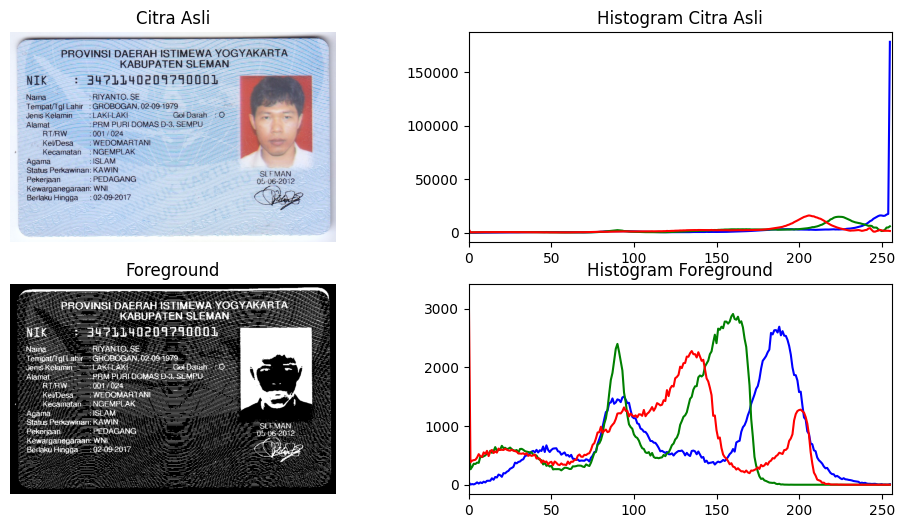

In [50]:
original_image = cv2.imread('image_thres/ktp.jpeg')
original_image = original_image.astype('uint8')
# hist of rgb original image
r = cv2.calcHist([original_image], [0], None, [256], [0, 256])
g = cv2.calcHist([original_image], [1], None, [256], [0, 256])
b = cv2.calcHist([original_image], [2], None, [256], [0, 256])
hist = pd.DataFrame({'r': r.ravel(), 'g': g.ravel(), 'b': b.ravel()})

# foreground using mask original image with global_thresholded
otsu_reverse = cv2.bitwise_not(otsu_thresholded)
# turn to image.shape[:2], dtype="uint8"
otsu_reverse = otsu_reverse.astype('uint8')

# find hist of orignal image with otsu_reverse mask
r = cv2.calcHist([original_image], [0], otsu_reverse, [256], [0, 256])
g = cv2.calcHist([original_image], [1], otsu_reverse, [256], [0, 256])
b = cv2.calcHist([original_image], [2], otsu_reverse, [256], [0, 256])
otsu_hist = pd.DataFrame({'r': r.ravel(), 'g': g.ravel(), 'b': b.ravel()})



# plot 
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histogram Citra Asli')
# color r g b
plt.plot(hist['r'], color='blue')
plt.plot(hist['g'], color='green')
plt.plot(hist['b'], color='red')

plt.xlim([0, 256])

plt.subplot(2, 2, 3)
plt.title('Foreground')
plt.imshow(otsu_reverse, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Histogram Foreground')
# color r g b
plt.plot(otsu_hist['r'], color='blue')
plt.plot(otsu_hist['g'], color='green')
plt.plot(otsu_hist['b'], color='red')
plt.xlim([0, 256])

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

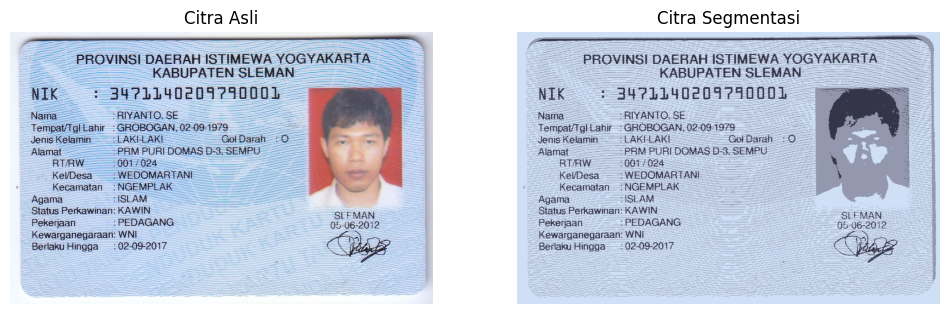

In [95]:
original_image = cv2.imread('image_thres/ktp.jpeg')
# k means
from sklearn.cluster import KMeans
# reshape image
pixel_values = original_image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters
k = 3
# apply k means
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(original_image.shape)
# only show certain cluster
mask = np.zeros_like(labels)
mask[labels == 2] = 255
mask[labels == 1] = 255
mask[labels == 3] = 255

mask = mask.astype('uint8')
mask = mask.reshape(original_image.shape[:2])
# error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
segmented_image = segmented_image.astype('uint8')
# apply mask to segmented image
masked = cv2.bitwise_and(segmented_image, segmented_image, mask=mask)
# turn black to white
masked[masked == 0] = 255


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Segmentasi')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

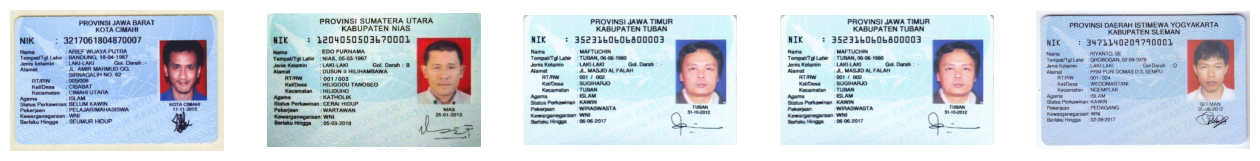

In [98]:
import glob 

images = [cv2.imread(file) for file in glob.glob("KTP_More/*")]


plt.figure(figsize=(16, 8))

for i in range(0, 5):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

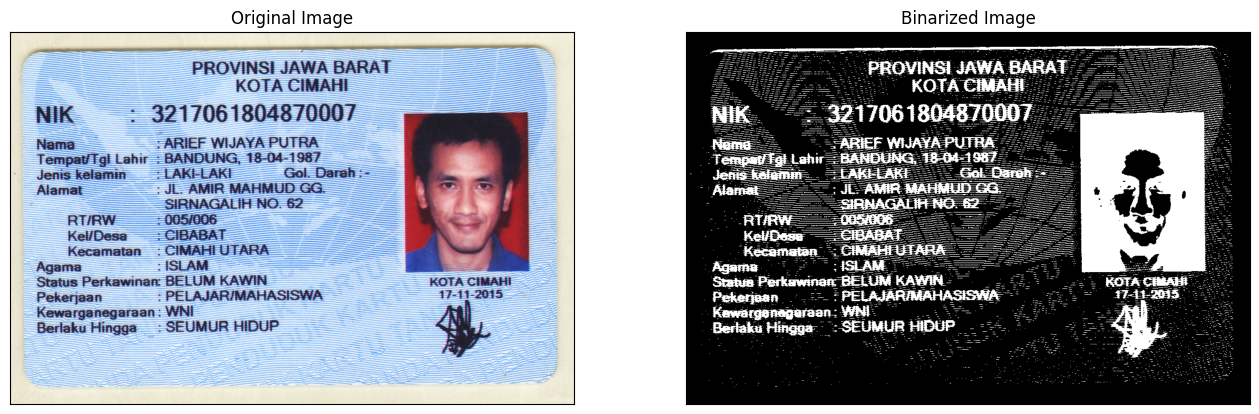

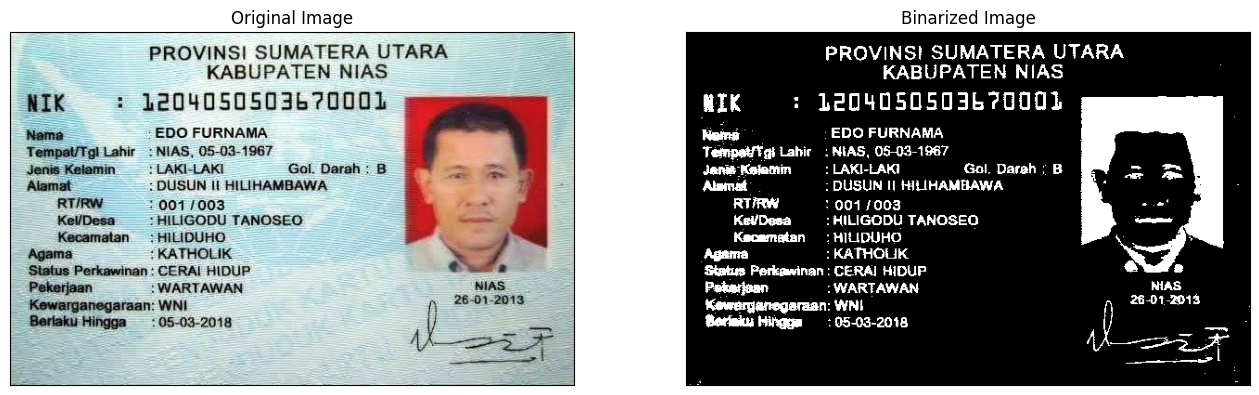

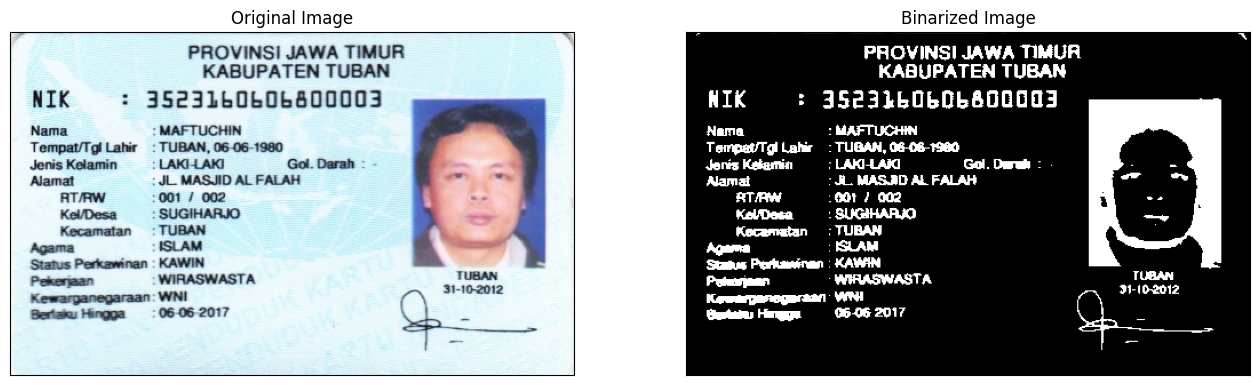

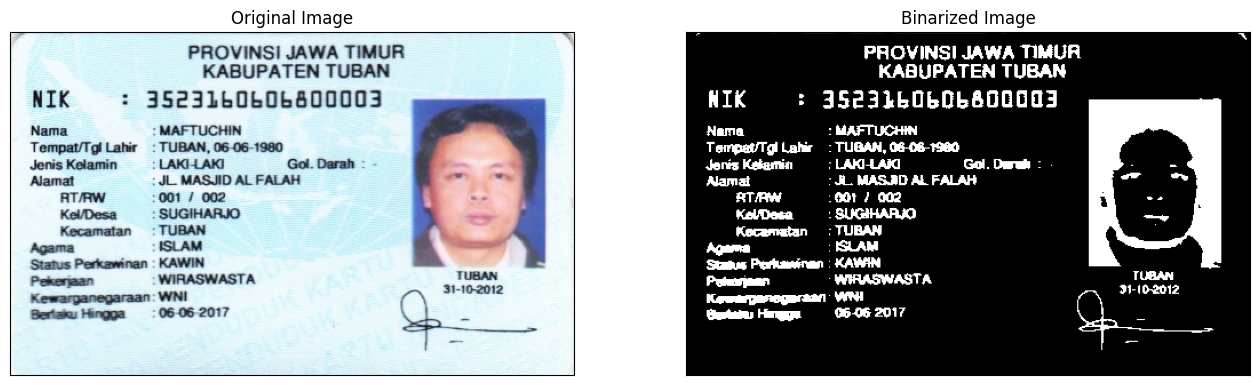

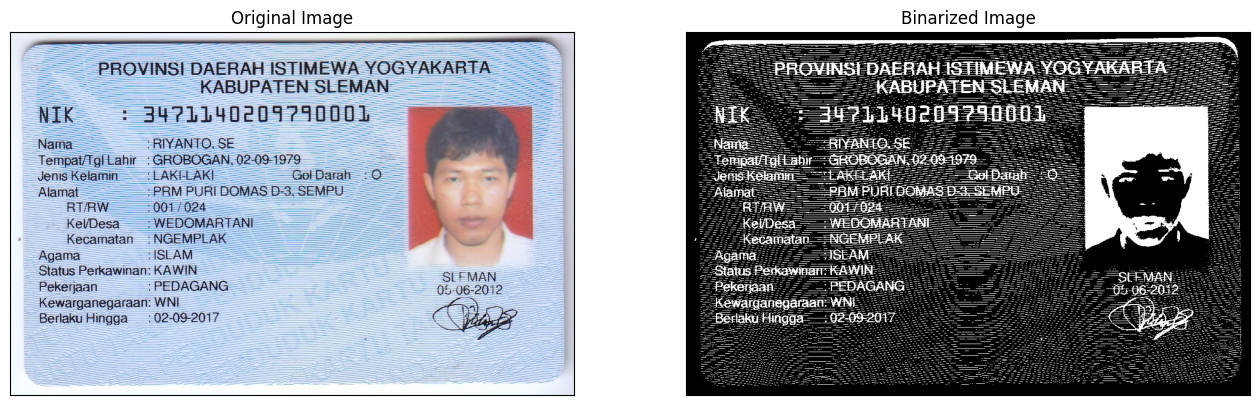

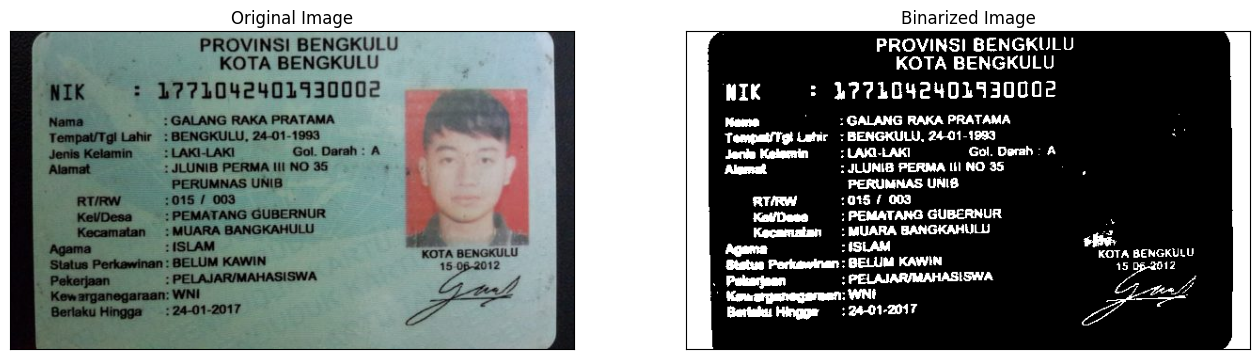

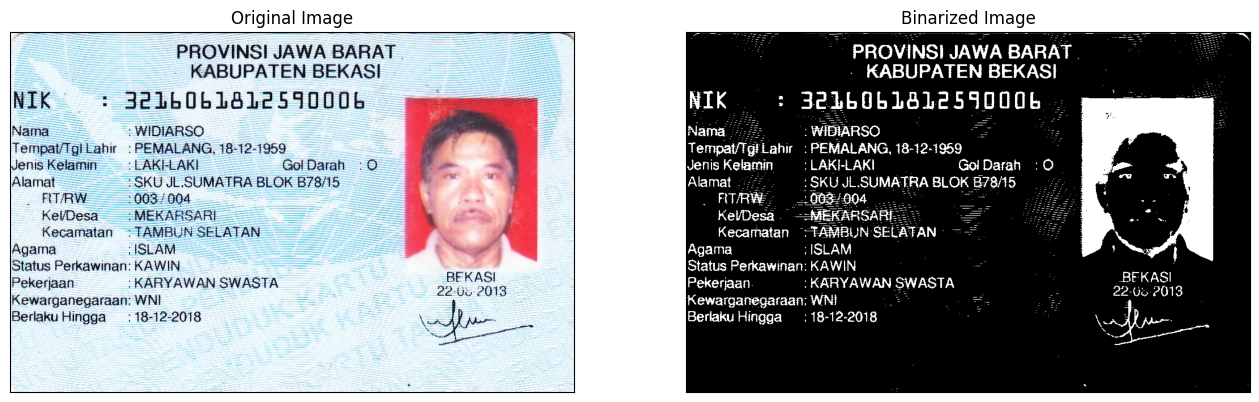

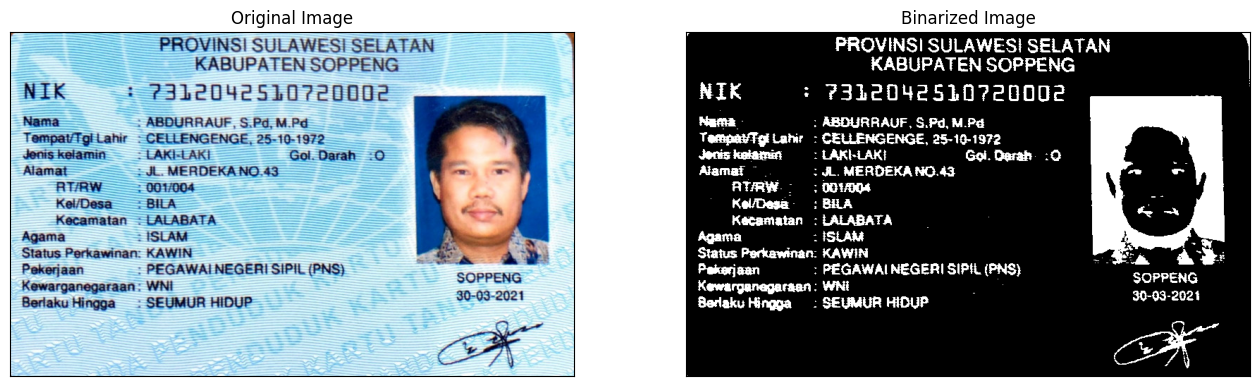

In [100]:
bf = 0 #binarization factor
for i in range(len(images)):
    img = images[i]
    img_org = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    idim_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    r,threshed = cv2.threshold(idim_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)   
    kernel = np.ones((1,1),np.uint8)
    final_th= cv2.dilate(threshed,kernel,iterations = 1)

    plt.figure(figsize=(16, 6))
    plt.subplot(121),plt.imshow(img_org)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(final_th,cmap = 'gray')
    plt.title('Binarized Image'), plt.xticks([]), plt.yticks([])